In [1]:
import gym 
import matplotlib.pyplot as plt
from gym import spaces
import numpy as np
import random

from google.colab import widgets
import time



---

**<h2>♟ *Deterministic Environment*</h2>**

---





In [2]:
class GridEnvironmentDeterministic(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)

        # positions
        self.up = 0
        self.down = 1
        self.right = 2
        self.left = 3

        # initial positions
        self.state = np.zeros((4,4))
        self.agent_pos=[0,0]
        self.goal_pos=[3,3]

        # reward positions
        self.rewards = {
            (2,0): -3,
            (1,2):-4,
            (1,0):2,
            (3,1):5,
            (3,3):20
        }
        self.done = False
        self.max_timesteps = 10

    def reset(self):
        
        self.done = False
        self.state = np.zeros((4,4))
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]       
        
        self.state[tuple(self.agent_pos)] = 10

        observation = self.state.flatten()
        return observation
    
    def step(self, action):

        self.state = np.random.choice(self.observation_space.n)
        if action == self.up:
          self.agent_pos[0] -= 1
        if action == self.down:
          self.agent_pos[0] += 1
        if action == self.right:
          self.agent_pos[1] += 1
        if action == self.left:
          self.agent_pos[1] -= 1
          
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))

        self.state[tuple(self.agent_pos)] = 10
        observation = self.state.flatten()
        
        reward = 0

        agent_pos_tuple = tuple(self.agent_pos)

        if (agent_pos_tuple in self.rewards):
          if(self.agent_pos == self.goal_pos).all():
            self.done = True
          reward = self.rewards[agent_pos_tuple]
        
        if(self.max_timesteps==1):
          self.done = True
        else:
          self.max_timesteps = self.max_timesteps - 1
        
        return self.agent_pos, reward, self.done, self.state
        
    def render(self):
        fig1, (ax1)= plt.subplots(1)
        for x,y in self.rewards.items():
          ax1.text(*x[::-1],s=y,ha='center',va='center',size='xx-large',color='black',backgroundcolor='white')
        plt.imshow(self.state)
        plt.show()
        


In [3]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)




---

**<h2>⛹ *Stochastic Environment*</h2>**

---





In [4]:
class GridEnvironmentStochastic(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)

        # positions
        self.up = 0
        self.down = 1
        self.right = 2
        self.left = 3

        # initial positions
        self.state = np.zeros((4,4))
        self.agent_pos=[0,0]
        self.goal_pos=[3,3]

        # reward positions
        # given in the format grid position, reward value
        self.rewards = {
            (2,0): -3,
            (1,2):-4,
            (1,0):2,
            (3,1):5,
            (3,3):20
        }
        self.done = False
        self.max_timesteps = 10

    def reset(self):
        
        self.done = False
        self.state = np.zeros((4,4))
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]       
        
        self.state[tuple(self.agent_pos)] = 10

        observation = self.state.flatten()

        self.max_timesteps = 10

        return observation
    
    def step(self, action):
        random_action = False

        # stochastic action selection at a probability of 0.6 for the given action and 0.4 for random action,
        # 60% of the time the given action is executed and 40% of the time a random action is executed 
        choose_action = [action,np.random.choice(self.action_space.n)]
        stoc_action = random.choices(choose_action, weights=(60, 40))
        if action != stoc_action[0]:
          random_action = True
        action = stoc_action[0]

        # print("action_step:",stoc_action)

        if action == self.up:
          self.agent_pos[0] -= 1
        if action == self.down:
          self.agent_pos[0] += 1
        if action == self.right:
          self.agent_pos[1] += 1
        if action == self.left:
          self.agent_pos[1] -= 1
          
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))

        self.state[tuple(self.agent_pos)] = 10
        observation = self.state.flatten()
        
        reward = 0

        agent_pos_tuple = tuple(self.agent_pos)

        if (agent_pos_tuple in self.rewards):
          if(self.agent_pos == self.goal_pos).all():
            self.done = True
          reward = self.rewards[agent_pos_tuple]

        if(self.max_timesteps==1):
          self.done = True
        else:
          self.max_timesteps = self.max_timesteps - 1
        
        return self.agent_pos, reward, self.done, self.state, random_action
        
    def render(self):
        fig1, (ax1)= plt.subplots(1)
        for x,y in self.rewards.items():
          ax1.text(*x[::-1],s=y,ha='center',va='center',size='xx-large',color='black',backgroundcolor='white')
        plt.imshow(self.state)
        plt.show()
        


In [5]:
def main():
  print("\n\n Visualizing deterministic environment with random actions for 10 timesteps \n\n")
  env = GridEnvironmentDeterministic()
  obs = env.reset()
  agent = RandomAgent(env)

  # initial action 
  # obs, reward, done ,state = env.step(action)
  env.render()

  output_grid = widgets.Grid(2, 2)

  action_map = {
      0:'up',
      1:'down',
      2:'right',
      3:'left'
  }

  done = False

  while not done:
    action = agent.step(obs)
    obs, reward, done ,state= env.step(action)
    with output_grid.output_to(0, 0):
      print('observation:',obs)
      print('reward:',reward)
      print('action:', action_map[action])
      print('action',action)
    
      env.render()
      print('-----------------')
    time.sleep(1)

  print("\n\n\n Visualizing stochastic environment with random actions for 10 timesteps\n\n")
  env = GridEnvironmentStochastic()
  obs = env.reset()
  agent = RandomAgent(env)

  # initial action 
  # obs, reward, done ,state = env.step(action)
  env.render()

  output_grid = widgets.Grid(2, 2)

  action_map = {
      0:'up',
      1:'down',
      2:'right',
      3:'left'
  }

  done = False

  while not done:
    action = agent.step(obs)
    obs, reward, done ,state,random_action= env.step(action)
    with output_grid.output_to(0, 0):
      print('observation:',obs)
      print('reward:',reward)
      print('action:', action_map[action])
      print('action',action)
      print('random_action',random_action)
      env.render()
      print('-----------------')
    time.sleep(1)



 Visualizing deterministic environment with random actions for 10 timesteps 




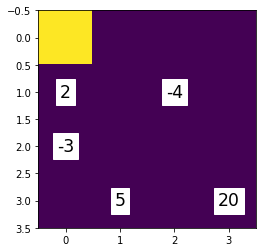

,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [1 0]
reward: 2
action: down
action 1


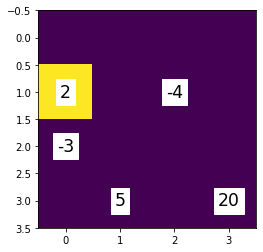

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [2 0]
reward: -3
action: down
action 1


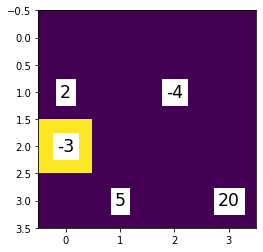

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [2 0]
reward: -3
action: left
action 3


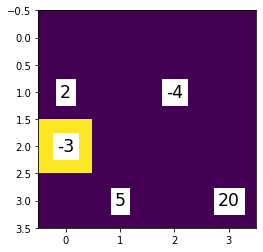

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [2 0]
reward: -3
action: left
action 3


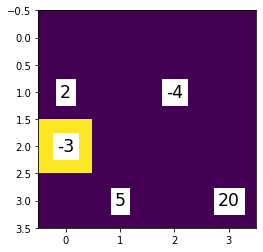

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [2 1]
reward: 0
action: right
action 2


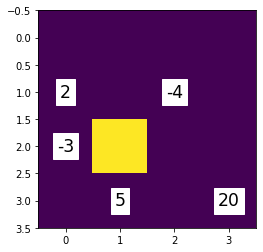

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [1 1]
reward: 0
action: up
action 0


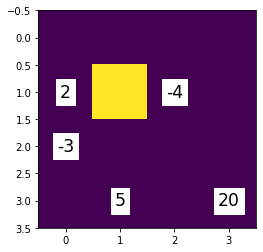

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [0 1]
reward: 0
action: up
action 0


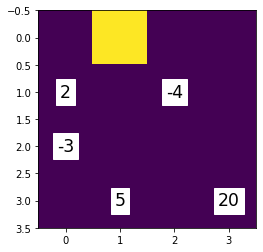

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [0 0]
reward: 0
action: left
action 3


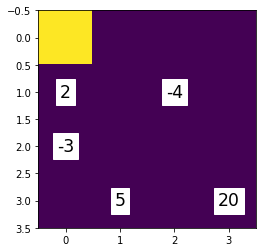

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [1 0]
reward: 2
action: down
action 1


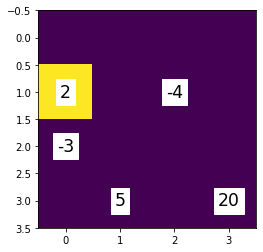

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [2 0]
reward: -3
action: down
action 1


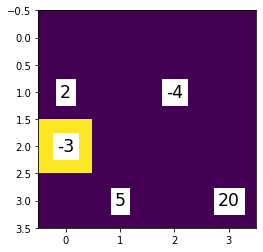

-----------------


<IPython.core.display.Javascript object>




 Visualizing stochastic environment with random actions for 10 timesteps




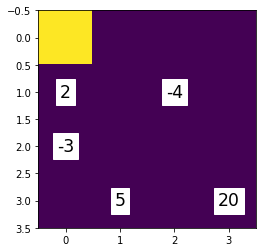

,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [0 1]
reward: 0
action: right
action 2
random_action False


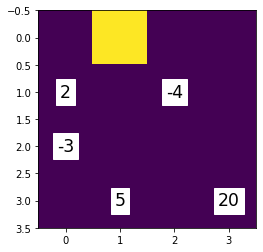

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [0 1]
reward: 0
action: up
action 0
random_action False


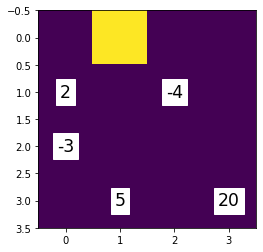

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [0 1]
reward: 0
action: down
action 1
random_action True


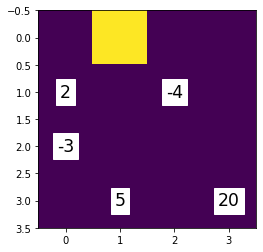

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [0 2]
reward: 0
action: left
action 3
random_action True


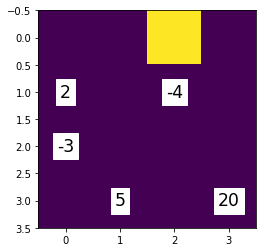

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [0 1]
reward: 0
action: left
action 3
random_action False


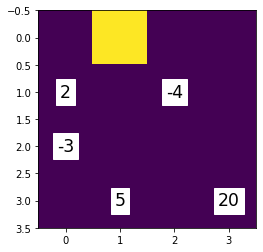

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [0 2]
reward: 0
action: right
action 2
random_action False


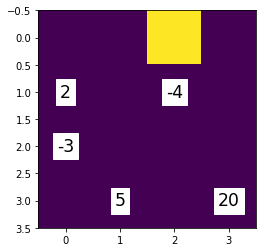

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [0 1]
reward: 0
action: up
action 0
random_action True


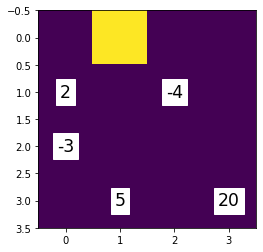

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [0 2]
reward: 0
action: right
action 2
random_action False


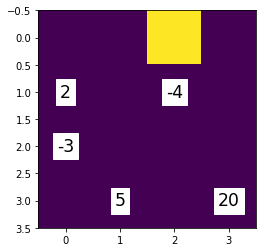

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [0 3]
reward: 0
action: down
action 1
random_action True


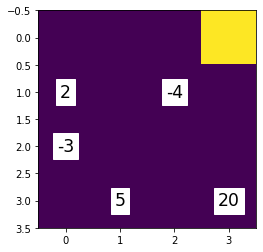

-----------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

observation: [1 3]
reward: 0
action: down
action 1
random_action False


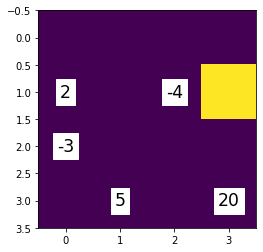

-----------------


<IPython.core.display.Javascript object>

In [6]:
main()